<a href="https://colab.research.google.com/github/CLASHERBROs/datasicence-minor-project/blob/main/data_sci_eval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np

In [3]:
import os
BEARER_TOKEN=os.getenv("BEARER_TOKEN")

We'll install python-twitter to fetch results

In [4]:
!pip install python-twitter

     |████████████████████████████████| 67 kB 5.6 MB/s 


In [5]:
!pip install requests

In [6]:
BEARER_TOKEN

'AAAAAAAAAAAAAAAAAAAAAJmacQEAAAAA76hdc08Mood3wxnHJyIY1JETfTo%3DMllknc8Yrx6AtxYgCarhc4iTmgiqvNVZGmHtLTDYLzT4mdO3ly'

In [7]:
import requests
import json

def search_twitter(query, tweet_fields, bearer_token = BEARER_TOKEN):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}

    url = "https://api.twitter.com/2/tweets/search/recent?query={}&{}&max_results=20".format(
        query, tweet_fields
    )
    response = requests.request("GET", url, headers=headers)

    print(response.status_code)

    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

In [8]:
city='delhi'

In [9]:
query = "Covid beds "+city
tweet_fields = "tweet.fields=text,author_id,created_at"
bed_json_response = search_twitter(query=query, tweet_fields=tweet_fields, bearer_token=BEARER_TOKEN)
print(json.dumps(bed_json_response, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "author_id": "4508461814",
            "created_at": "2022-05-17T13:14:11.000Z",
            "id": "1526551654685765632",
            "text": "#Delhi new #COVID cases slightly increased (tests slightly increased too) and the positive rate remains same as y'day. Active cases on the declining trend.\n\nNew Cases=393\nDeaths=2\nToday Recovery=709\nTests:11731\nActive=2910\nTPR=3.35%\nBeds occupancy =1.3%\n#COVID19 #Omicron #MaskUp https://t.co/QD0p5yFr1u"
        },
        {
            "author_id": "1084779753863708672",
            "created_at": "2022-05-13T13:58:54.000Z",
            "id": "1525113357652533248",
            "text": "@NirjhariSinha People were dying by thousands without oxygen,hospital beds in Delhi (Covid-19 second wave), we've not seen any mohalla clinic, Kejriwal is spending money in advts only like Modi (thank you Modiji) &amp; @bhupeshbaghel . \nOnly beneficial @ndtv ,now watch 24\u00d77 kejubhai's yoga session."
        }

In [10]:
query = "vaccine "+city
tweet_fields = "tweet.fields=text,author_id,created_at"
vaccine_json_response = search_twitter(query=query, tweet_fields=tweet_fields, bearer_token=BEARER_TOKEN)
print(json.dumps(vaccine_json_response, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "author_id": "1446853839265611786",
            "created_at": "2022-05-18T08:18:24.000Z",
            "id": "1526839607148568576",
            "text": "@abdullah_0mar @JayantA2909 @ArvindKejriwal No party is perfect bt wat @ArvindKejriwal  hs dn 4 delhi itself speaks volumes, proud 2 vote aap &amp; wil keep doin dat. Ty i live in south delhi electricity bill ws zero last yr water is cumn.Experience of vaccine in gov school ws g8. Keep working hard &amp; keep improving 4 better \u270c\ud83c\udffd"
        },
        {
            "author_id": "1396115471703805953",
            "created_at": "2022-05-18T08:17:06.000Z",
            "id": "1526839279401377792",
            "text": "NE delhi has at least 109 new slots available between 18-05-22 &amp; 25-05-22.\n\nCovishield:\nDose1- 18+/45+:21/0\nDose2- 18+/45+:19/0\n\nCovaxin:\nDose1- 18+/45+:0/0\nDose2- 18+/45+:0/0\n\nBook one now at https://t.co/oN1Ae9Fz77 #vaccine #cowin #covid #delhi"
        }

In [11]:
query = "Covid testing "+city
tweet_fields = "tweet.fields=text,author_id,created_at"
test_json_response = search_twitter(query=query, tweet_fields=tweet_fields, bearer_token=BEARER_TOKEN)
print(json.dumps(test_json_response, indent=4, sort_keys=True))

200
{
    "data": [
        {
            "author_id": "1366261186086363136",
            "created_at": "2022-05-18T05:54:38.000Z",
            "id": "1526803429351313411",
            "text": "RT @DMSouthDelhi: Please do not hesitate and get tested if you have any symptoms like fever, cough,cold. Here is the list of #corona testin\u2026"
        },
        {
            "author_id": "1085465722732580864",
            "created_at": "2022-05-18T05:50:58.000Z",
            "id": "1526802506587643904",
            "text": "RT @DMSouthDelhi: Please do not hesitate and get tested if you have any symptoms like fever, cough,cold. Here is the list of #corona testin\u2026"
        },
        {
            "author_id": "1246399904890535936",
            "created_at": "2022-05-18T05:35:37.000Z",
            "id": "1526798643382358016",
            "text": "Please do not hesitate and get tested if you have any symptoms like fever, cough,cold. Here is the list of #corona testing centres for today\n

In [12]:
bed_texts=[]
vaccine_texts=[]
test_texts=[]

In [13]:
for i in bed_json_response['data']:
  bed_texts.append(i['text'])
for i in vaccine_json_response['data']:
  vaccine_texts.append(i['text'])
for i in test_json_response['data']:
  test_texts.append(i['text'])

In [14]:
bed_df=pd.DataFrame(bed_texts,columns=["Bed Tweets"])
vaccine_df=pd.DataFrame(vaccine_texts,columns=["Vaccine tweets"])
test_df=pd.DataFrame(test_texts,columns=["test tweets"])


In [15]:
bed_df

,Bed Tweets
0,#Delhi new #COVID cases slightly increased (te...
1,@NirjhariSinha People were dying by thousands ...
2,@alok_bhatt Remember Kejriwal booking an entir...
3,RT @sure99: Pl keep on laughing\nHindus dont c...
4,Pl keep on laughing\nHindus dont curse anyone!...
5,"How sensitive! 4 hour lockdown notice, 40 lakh..."


In [16]:
vaccine_df

,Vaccine tweets
0,@abdullah_0mar @JayantA2909 @ArvindKejriwal No...
1,NE delhi has at least 109 new slots available ...
2,Central Delhi has at least 12737 new slots ava...
3,World AIDS Vaccine Day: जानें कहां से आई ये बी...
4,NE delhi has at least 97 new slots available b...
5,Central Delhi has at least 10990 new slots ava...
6,NE delhi has at least 80 new slots available b...
7,Central Delhi has at least 8903 new slots avai...
8,NE delhi has at least 57 new slots available b...
9,Central Delhi has at least 7857 new slots avai...


In [17]:
test_df

,test tweets
0,RT @DMSouthDelhi: Please do not hesitate and g...
1,RT @DMSouthDelhi: Please do not hesitate and g...
2,Please do not hesitate and get tested if you h...
3,"@stuti_kute Dear Stuti,\nRT-PCR report is not ..."
4,"Visit Free Covid test camps for corona tests, ..."


##Now NLP and we'll fetch positive results from the above

## Training model using LSTM


In [18]:
df= pd.read_csv('train.csv')
df.head(3)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative


In [19]:
tweet_df = df[['text','sentiment']]
tweet_df.head(10)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,positive


In [20]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 2, 2, 0]),
 Index(['neutral', 'negative', 'positive'], dtype='object'))

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet = tweet_df.text.values.astype("str")
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [23]:
print(tokenizer.word_index)
print(vocab_size)

{'i': 1, 'to': 2, 'the': 3, 'a': 4, 'my': 5, 'it': 6, 'you': 7, 'and': 8, 'is': 9, 'in': 10, 'for': 11, 's': 12, 'of': 13, 't': 14, 'that': 15, 'on': 16, 'me': 17, 'so': 18, 'have': 19, 'but': 20, 'm': 21, 'just': 22, 'day': 23, 'with': 24, 'be': 25, 'at': 26, 'not': 27, 'was': 28, 'all': 29, 'now': 30, 'can': 31, 'good': 32, 'this': 33, 'out': 34, 'up': 35, 'get': 36, 'no': 37, 'are': 38, 'like': 39, 'go': 40, 'http': 41, 'your': 42, 'do': 43, 'work': 44, 'today': 45, 'love': 46, 'too': 47, 'going': 48, 'got': 49, 'we': 50, 'lol': 51, 'what': 52, 'happy': 53, 'one': 54, 'from': 55, 'u': 56, 'time': 57, 'know': 58, 'there': 59, 'really': 60, 'back': 61, 'will': 62, 'com': 63, 'im': 64, 'don': 65, 'about': 66, 'am': 67, 'had': 68, 'its': 69, 'see': 70, 'some': 71, 'they': 72, 'if': 73, 'night': 74, 'new': 75, 'home': 76, '2': 77, 'want': 78, 'well': 79, 'how': 80, 'think': 81, 'as': 82, 'still': 83, 'when': 84, 'll': 85, 'more': 86, 'oh': 87, 'thanks': 88, 'off': 89, 'much': 90, 'here':

In [24]:
print(tweet[0])
print(encoded_docs[0])

 I`d have responded, if I were going
[1, 165, 19, 73, 1, 150, 48]


In [25]:
print(padded_sequence[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1 165  19  73   1
 150  48]


In [26]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           851168    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 867,819
Trainable params: 867,819
Non-trainable params: 0
__________________________________________________

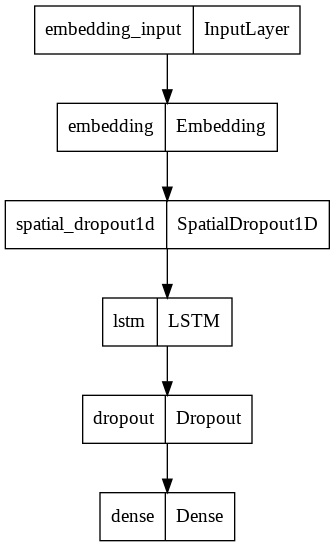

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [28]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
687/687 [==============================] - 131s 186ms/step - loss: -0.4501 - accuracy: 0.3155 - val_loss: -2.6436 - val_accuracy: 0.3829
Epoch 2/5
687/687 [==============================] - 113s 164ms/step - loss: -1.0767 - accuracy: 0.3476 - val_loss: 3.5177 - val_accuracy: 0.2885
Epoch 3/5
687/687 [==============================] - 111s 161ms/step - loss: -5.6097 - accuracy: 0.3860 - val_loss: -7.8928 - val_accuracy: 0.4073
Epoch 4/5
687/687 [==============================] - 111s 161ms/step - loss: -12.6285 - accuracy: 0.4142 - val_loss: -13.2628 - val_accuracy: 0.4082
Epoch 5/5
687/687 [==============================] - 110s 160ms/step - loss: -18.5128 - accuracy: 0.4012 - val_loss: -18.0531 - val_accuracy: 0.4097


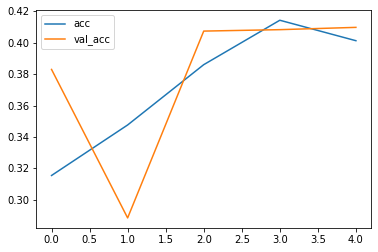

In [29]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

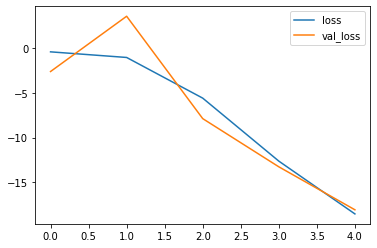

In [30]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [31]:
test_word ="This is soo sad"
tw = tokenizer.texts_to_sequences([test_word])
tw

[[33, 9, 543, 119]]

In [33]:
tw = pad_sequences(tw,maxlen=200)
tw

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [34]:
prediction = int(model.predict(tw).round().item())

In [36]:
sentiment_label[1][prediction]

'negative'

In [44]:
bed_lbl=[]
for j in bed_texts:
  tw = tokenizer.texts_to_sequences([j])
  tw = pad_sequences(tw,maxlen=200)
  prediction = int(model.predict(tw).round().item())
  bed_lbl.append(sentiment_label[1][prediction])

In [45]:
bed_lbl

['negative', 'negative', 'negative', 'negative', 'negative', 'negative']

In [46]:
test_lbl=[]
for j in test_texts:
  tw = tokenizer.texts_to_sequences([j])
  tw = pad_sequences(tw,maxlen=200)
  prediction = int(model.predict(tw).round().item())
  test_lbl.append(sentiment_label[1][prediction])

In [47]:
test_lbl

['neutral', 'neutral', 'negative', 'neutral', 'negative']

In [48]:
test_texts

['RT @DMSouthDelhi: Please do not hesitate and get tested if you have any symptoms like fever, cough,cold. Here is the list of #corona testin…',
 'RT @DMSouthDelhi: Please do not hesitate and get tested if you have any symptoms like fever, cough,cold. Here is the list of #corona testin…',
 'Please do not hesitate and get tested if you have any symptoms like fever, cough,cold. Here is the list of #corona testing centres for today\nhttps://t.co/4PLs0tNACk \n#southdelhifightscorona #COVID #coronatest https://t.co/lmKosVwYJh',
 '@stuti_kute Dear Stuti,\nRT-PCR report is not required for domestic arrivals at Delhi Airport. Please note, as per the latest govt mandate, District Disaster Management Authorities shall conduct random COVID-19 testing of passengers coming from the states where the cases are increasing. (1/2)',
 'Visit Free Covid test camps for corona tests, organise by #DistrictSouth administration Here are the locations for today 12th May\nhttps://t.co/4PLs0tNACk\n#southdelhifigh

In [49]:
vaccine_lbl=[]
for j in vaccine_texts:
  tw = tokenizer.texts_to_sequences([j])
  tw = pad_sequences(tw,maxlen=200)
  prediction = int(model.predict(tw).round().item())
  vaccine_lbl.append(sentiment_label[1][prediction])

In [50]:
vaccine_lbl

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative']

In [51]:
bed_df['label']=bed_lbl
vaccine_df['label']=vaccine_lbl
test_df['label']=test_lbl


In [52]:
bed_df

,Bed Tweets,label
0,#Delhi new #COVID cases slightly increased (te...,negative
1,@NirjhariSinha People were dying by thousands ...,negative
2,@alok_bhatt Remember Kejriwal booking an entir...,negative
3,RT @sure99: Pl keep on laughing\nHindus dont c...,negative
4,Pl keep on laughing\nHindus dont curse anyone!...,negative
5,"How sensitive! 4 hour lockdown notice, 40 lakh...",negative


In [53]:
vaccine_df

,Vaccine tweets,label
0,@abdullah_0mar @JayantA2909 @ArvindKejriwal No...,negative
1,NE delhi has at least 109 new slots available ...,negative
2,Central Delhi has at least 12737 new slots ava...,negative
3,World AIDS Vaccine Day: जानें कहां से आई ये बी...,negative
4,NE delhi has at least 97 new slots available b...,negative
5,Central Delhi has at least 10990 new slots ava...,negative
6,NE delhi has at least 80 new slots available b...,negative
7,Central Delhi has at least 8903 new slots avai...,negative
8,NE delhi has at least 57 new slots available b...,negative
9,Central Delhi has at least 7857 new slots avai...,negative


In [54]:
test_df

,test tweets,label
0,RT @DMSouthDelhi: Please do not hesitate and g...,neutral
1,RT @DMSouthDelhi: Please do not hesitate and g...,neutral
2,Please do not hesitate and get tested if you h...,negative
3,"@stuti_kute Dear Stuti,\nRT-PCR report is not ...",neutral
4,"Visit Free Covid test camps for corona tests, ...",negative


##Word vectors

In [67]:
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path
import nltk
# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [68]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [57]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 10  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 24  # Maximum number of words in a sequence
GLOVE_DIM = 100  # Number of dimensions of the GloVe word embeddings

In [58]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    return history


def eval_metric(history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    
    return results

def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 
    
def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    return re.sub(r'@\w+', '', input_text)

In [69]:
df = pd.read_csv('Tweets.csv')
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment']]
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 13176
# Test data samples: 1464


In [71]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [72]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    13176.000000
mean        11.135094
std          4.227367
min          1.000000
25%          8.000000
50%         12.000000
75%         14.000000
max         24.000000
Name: text, dtype: float64

In [73]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [74]:
X_train_seq_trunc[10]  # Example of padded sequence

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 2908,
        259,  121], dtype=int32)

In [75]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [76]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of validation set:',X_valid_emb.shape)

Shape of validation set: (1318, 24)


###Modeling

In [77]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(3, activation='softmax'))
emb_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 24, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 579       
                                                                 
Total params: 80,579
Trainable params: 80,579
Non-trainable params: 0
_________________________________________________________________


In [80]:
emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)
emb_history.history['accuracy'][-1]

0.8699612021446228

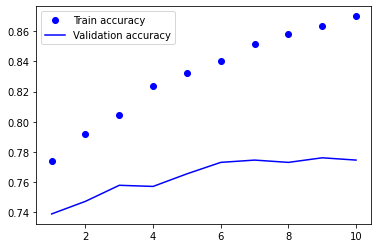

In [82]:
eval_metric(emb_history, 'accuracy')

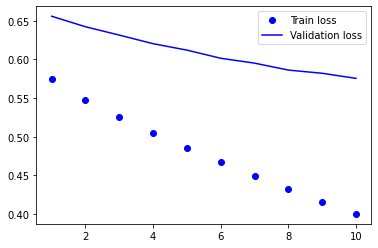

In [83]:
eval_metric(emb_history, 'loss')

In [84]:
emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

46/46 [==============================] - 0s 4ms/step - loss: 0.5539 - accuracy: 0.7671
/n
Test accuracy of word embeddings model: 76.71%
